In [1]:
import copy
import pickle
import multiprocessing
from pathlib import Path
from IPython.display import display, Markdown

import plotly.express as px
import matplotlib.pyplot as plt

import toml
import numpy as np
import pandas as pd

import ray
import mlflow
from flaml import AutoML
from sklearn.model_selection import train_test_split

import sys
sys.path.append("..")
from term_deposit.regression import plot_true_vs_predicted

# Load the configuration file
settings = toml.load('../config.toml')

In [2]:
# Load the data
df = pd.read_parquet(".."+settings['paths']["data"]['raw_pdata'])

# Split the data
df_signup = df[df.y=="yes"]
y = df_signup["campaign"]
X = df_signup[df_signup.y=="yes"].drop(columns=["y", "campaign", "duration"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [3]:
# Initialize an AutoML instance
automl = AutoML()

# Dynamically get the number of available CPU cores
num_cpus = multiprocessing.cpu_count()

# Log model info to MLflow in the main process
mlflow.set_experiment("flaml_parallel_experiment")
with mlflow.start_run():
    automl = AutoML()
    automl.fit(X_train,y_train, **settings["automl"])


try:
    # Save the model
    with open("automl.pkl", "wb") as f:
        pickle.dump(automl, f)
except Exception as e:
    print("We could not save the model")
    print(e)

c:\Users\Guill\miniconda3\envs\term_deposit\lib\site-packages\flaml\data.py:214: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(np.nan, inplace=True)
c:\Users\Guill\miniconda3\envs\term_deposit\lib\site-packages\flaml\data.py:207: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3

[flaml.automl: 10-03 09:53:25] {787} INFO -  at 0.4s,	best lgbm's error=0.9071,	best lgbm's error=0.9071
[flaml.automl: 10-03 09:53:25] {728} INFO - iteration 2  current learner xgboost


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 2316, number of used features: 11
[LightGBM] [Info] Start training from score 2.421848
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 2316, number of used features: 11
[LightGBM] [Info] Start training from score 2.421848


[flaml.automl: 10-03 09:53:25] {787} INFO -  at 0.8s,	best xgboost's error=0.9489,	best lgbm's error=0.9071
[flaml.automl: 10-03 09:53:25] {728} INFO - iteration 3  current learner extra_tree
[flaml.automl: 10-03 09:53:25] {787} INFO -  at 1.3s,	best extra_tree's error=1.1626,	best lgbm's error=0.9071
[flaml.automl: 10-03 09:53:25] {728} INFO - iteration 4  current learner rf
[flaml.automl: 10-03 09:53:26] {787} INFO -  at 1.7s,	best rf's error=1.1376,	best lgbm's error=0.9071
[flaml.automl: 10-03 09:53:26] {728} INFO - iteration 5  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:26] {787} INFO -  at 2.0s,	best lgbm's error=0.9034,	best lgbm's error=0.9034
[flaml.automl: 10-03 09:53:26] {728} INFO - iteration 6  current learner xgboost


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 2316, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:27] {787} INFO -  at 2.3s,	best xgboost's error=0.9489,	best lgbm's error=0.9034
[flaml.automl: 10-03 09:53:27] {728} INFO - iteration 7  current learner lgbm
[flaml.automl: 10-03 09:53:27] {787} INFO -  at 2.5s,	best lgbm's error=0.8958,	best lgbm's error=0.8958
[flaml.automl: 10-03 09:53:27] {728} INFO - iteration 8  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:27] {787} INFO -  at 2.6s,	best lgbm's error=0.8771,	best lgbm's error=0.8771
[flaml.automl: 10-03 09:53:27] {728} INFO - iteration 9  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:27] {787} INFO -  at 2.9s,	best lgbm's error=0.8771,	best lgbm's error=0.8771
[flaml.automl: 10-03 09:53:27] {728} INFO - iteration 10  current learner extra_tree


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:28] {787} INFO -  at 3.3s,	best extra_tree's error=1.0217,	best lgbm's error=0.8771
[flaml.automl: 10-03 09:53:28] {728} INFO - iteration 11  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:28] {787} INFO -  at 3.7s,	best lgbm's error=0.8745,	best lgbm's error=0.8745
[flaml.automl: 10-03 09:53:28] {728} INFO - iteration 12  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:28] {787} INFO -  at 4.0s,	best lgbm's error=0.8722,	best lgbm's error=0.8722


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:28] {728} INFO - iteration 13  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:28] {787} INFO -  at 4.2s,	best lgbm's error=0.8722,	best lgbm's error=0.8722
[flaml.automl: 10-03 09:53:28] {728} INFO - iteration 14  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7

[flaml.automl: 10-03 09:53:29] {787} INFO -  at 4.5s,	best lgbm's error=0.8722,	best lgbm's error=0.8722
[flaml.automl: 10-03 09:53:29] {728} INFO - iteration 15  current learner extra_tree


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:30] {787} INFO -  at 5.4s,	best extra_tree's error=1.0217,	best lgbm's error=0.8722
[flaml.automl: 10-03 09:53:30] {728} INFO - iteration 16  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:30] {787} INFO -  at 5.7s,	best lgbm's error=0.8638,	best lgbm's error=0.8638
[flaml.automl: 10-03 09:53:30] {728} INFO - iteration 17  current learner xgboost


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 2316, number of used features: 11
[LightGBM] [Info] Start training from score 2.421848
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:30] {787} INFO -  at 6.0s,	best xgboost's error=0.9489,	best lgbm's error=0.8638
[flaml.automl: 10-03 09:53:30] {728} INFO - iteration 18  current learner rf
[flaml.automl: 10-03 09:53:31] {787} INFO -  at 6.4s,	best rf's error=1.1376,	best lgbm's error=0.8638
[flaml.automl: 10-03 09:53:31] {728} INFO - iteration 19  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:31] {787} INFO -  at 6.7s,	best lgbm's error=0.8637,	best lgbm's error=0.8637
[flaml.automl: 10-03 09:53:31] {728} INFO - iteration 20  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:31] {787} INFO -  at 7.0s,	best lgbm's error=0.8637,	best lgbm's error=0.8637
[flaml.automl: 10-03 09:53:31] {728} INFO - iteration 21  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:53:31] {787} INFO -  at 7.2s,	best lgbm's error=0.8612,	best lgbm's error=0.8612
[flaml.automl: 10-03 09:53:31] {728} INFO - iteration 22  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:32] {787} INFO -  at 7.6s,	best lgbm's error=0.8612,	best lgbm's error=0.8612
[flaml.automl: 10-03 09:53:32] {728} INFO - iteration 23  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:32] {787} INFO -  at 7.9s,	best lgbm's error=0.8612,	best lgbm's error=0.8612
[flaml.automl: 10-03 09:53:32] {728} INFO - iteration 24  current learner extra_tree


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:53:34] {787} INFO -  at 9.3s,	best extra_tree's error=0.9927,	best lgbm's error=0.8612
[flaml.automl: 10-03 09:53:34] {728} INFO - iteration 25  current learner lgbm
[flaml.automl: 10-03 09:53:34] {787} INFO -  at 9.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:34] {728} INFO - iteration 26  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:34] {787} INFO -  at 9.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:34] {728} INFO - iteration 27  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:35] {787} INFO -  at 10.4s,	best rf's error=1.0125,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:35] {728} INFO - iteration 28  current learner rf
[flaml.automl: 10-03 09:53:36] {787} INFO -  at 11.4s,	best rf's error=1.0072,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:36] {728} INFO - iteration 29  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:53:36] {787} INFO -  at 11.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:36] {728} INFO - iteration 30  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:36] {787} INFO -  at 12.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:36] {728} INFO - iteration 31  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:37] {787} INFO -  at 12.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:37] {728} INFO - iteration 32  current learner xgboost


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:53:37] {787} INFO -  at 12.8s,	best xgboost's error=0.9489,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:37] {728} INFO - iteration 33  current learner xgboost
[flaml.automl: 10-03 09:53:37] {787} INFO -  at 13.1s,	best xgboost's error=0.9285,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:37] {728} INFO - iteration 34  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:38] {787} INFO -  at 13.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:38] {728} INFO - iteration 35  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:38] {787} INFO -  at 13.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:38] {728} INFO - iteration 36  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:38] {787} INFO -  at 14.3s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:38] {728} INFO - iteration 37  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:39] {787} INFO -  at 14.6s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:39] {728} INFO - iteration 38  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:53:39] {787} INFO -  at 15.0s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:39] {728} INFO - iteration 39  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:40] {787} INFO -  at 15.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:40] {728} INFO - iteration 40  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:40] {787} INFO -  at 15.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:40] {728} INFO - iteration 41  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:40] {787} INFO -  at 16.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:40] {728} INFO - iteration 42  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:53:41] {787} INFO -  at 16.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:41] {728} INFO - iteration 43  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:41] {787} INFO -  at 16.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:41] {728} INFO - iteration 44  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:41] {787} INFO -  at 17.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:41] {728} INFO - iteration 45  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:42] {787} INFO -  at 17.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:42] {728} INFO - iteration 46  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:42] {787} INFO -  at 18.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:42] {728} INFO - iteration 47  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:43] {787} INFO -  at 18.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:53:43] {728} INFO - iteration 48  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:43] {787} INFO -  at 18.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:43] {728} INFO - iteration 49  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:43] {787} INFO -  at 19.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:43] {728} INFO - iteration 50  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:44] {787} INFO -  at 19.6s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:44] {728} INFO - iteration 51  current learner xgboost
[flaml.automl: 10-03 09:53:44] {787} INFO -  at 20.0s,	best xgboost's error=0.8735,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:44] {728} INFO - iteration 52  current learner xgboost
[flaml.automl: 10-03 09:53:45] {787} INFO -  at 20.4s,	best xgboost's error=0.8735,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:45] {728} INFO - iteration 53  current learner xgboost
[flaml.automl: 10-03 09:53:45] {787} INFO -  at 20.8s,	best xgboost's error=0.8735,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:45] {728} INFO - iteration 54  current learner xgboost
[flaml.automl: 10-03 09:53:45] {787} INFO -  at 21.2s,	best xgboost's error=0.8735,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:45] {728} INFO - iteration 55  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:46] {787} INFO -  at 21.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:46] {728} INFO - iteration 56  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:53:46] {787} INFO -  at 21.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:46] {728} INFO - iteration 57  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:53:46] {787} INFO -  at 22.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:46] {728} INFO - iteration 58  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:47] {787} INFO -  at 22.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:47] {728} INFO - iteration 59  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:47] {787} INFO -  at 22.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:47] {728} INFO - iteration 60  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:48] {787} INFO -  at 23.3s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:48] {728} INFO - iteration 61  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:48] {787} INFO -  at 23.6s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:48] {728} INFO - iteration 62  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:48] {787} INFO -  at 24.0s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:48] {728} INFO - iteration 63  current learner xgboost


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:49] {787} INFO -  at 24.5s,	best xgboost's error=0.8735,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:49] {728} INFO - iteration 64  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:49] {787} INFO -  at 24.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:49] {728} INFO - iteration 65  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:49] {787} INFO -  at 25.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:49] {728} INFO - iteration 66  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:50] {787} INFO -  at 25.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:50] {728} INFO - iteration 67  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:50] {787} INFO -  at 25.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be igno

[flaml.automl: 10-03 09:53:50] {728} INFO - iteration 68  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:50] {787} INFO -  at 26.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:50] {728} INFO - iteration 69  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:51] {787} INFO -  at 26.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:51] {728} INFO - iteration 70  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:51] {787} INFO -  at 26.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:51] {728} INFO - iteration 71  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:51] {787} INFO -  at 27.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:51] {728} INFO - iteration 72  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:52] {787} INFO -  at 27.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:52] {728} INFO - iteration 73  current learner xgboost
[flaml.automl: 10-03 09:53:52] {787} INFO -  at 27.7s,	best xgboost's error=0.8629,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:52] {728} INFO - iteration 74  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:52] {787} INFO -  at 28.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:52] {728} INFO - iteration 75  current learner xgboost


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:53:53] {787} INFO -  at 28.6s,	best xgboost's error=0.8629,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:53] {728} INFO - iteration 76  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:53] {787} INFO -  at 29.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:53] {728} INFO - iteration 77  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:53:54] {787} INFO -  at 29.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:54] {728} INFO - iteration 78  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:53:54] {787} INFO -  at 29.7s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:53:54] {728} INFO - iteration 79  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:53:54] {787} INFO -  at 30.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:54] {728} INFO - iteration 80  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:55] {787} INFO -  at 30.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:55] {728} INFO - iteration 81  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:55] {787} INFO -  at 30.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:55] {728} INFO - iteration 82  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:55] {787} INFO -  at 31.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:55] {728} INFO - iteration 83  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:53:56] {787} INFO -  at 31.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:56] {728} INFO - iteration 84  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:56] {787} INFO -  at 31.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:56] {728} INFO - iteration 85  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:53:57] {787} INFO -  at 32.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:57] {728} INFO - iteration 86  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:57] {787} INFO -  at 33.0s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:57] {728} INFO - iteration 87  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:58] {787} INFO -  at 33.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:58] {728} INFO - iteration 88  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:58] {787} INFO -  at 33.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:58] {728} INFO - iteration 89  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:53:58] {787} INFO -  at 34.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:58] {728} INFO - iteration 90  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:53:59] {787} INFO -  at 34.6s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:59] {728} INFO - iteration 91  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:53:59] {787} INFO -  at 35.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:53:59] {728} INFO - iteration 92  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:00] {787} INFO -  at 35.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:54:00] {728} INFO - iteration 93  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:00] {787} INFO -  at 35.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:00] {728} INFO - iteration 94  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:54:00] {787} INFO -  at 36.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:00] {728} INFO - iteration 95  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:01] {787} INFO -  at 36.6s,	best lgbm's error=0.8521,	best lgbm's error=0.8521


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003719 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:01] {728} INFO - iteration 96  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:01] {787} INFO -  at 36.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:01] {728} INFO - iteration 97  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:01] {787} INFO -  at 37.2s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:01] {728} INFO - iteration 98  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:02] {787} INFO -  at 37.5s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:02] {728} INFO - iteration 99  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:02] {787} INFO -  at 37.8s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:02] {728} INFO - iteration 100  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:02] {787} INFO -  at 38.1s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:02] {728} INFO - iteration 101  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choo

[flaml.automl: 10-03 09:54:03] {787} INFO -  at 38.4s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:03] {728} INFO - iteration 102  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:03] {787} INFO -  at 38.9s,	best lgbm's error=0.8521,	best lgbm's error=0.8521
[flaml.automl: 10-03 09:54:03] {728} INFO - iteration 103  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:04] {787} INFO -  at 39.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:04] {728} INFO - iteration 104  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:04] {787} INFO -  at 39.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:04] {728} INFO - iteration 105  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:04] {787} INFO -  at 40.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:04] {728} INFO - iteration 106  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:05] {787} INFO -  at 40.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:05] {728} INFO - iteration 107  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:05] {787} INFO -  at 40.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:05] {728} INFO - iteration 108  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:05] {787} INFO -  at 41.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:05] {728} INFO - iteration 109  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:06] {787} INFO -  at 41.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:06] {728} INFO - iteration 110  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:06] {787} INFO -  at 42.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:06] {728} INFO - iteration 111  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:07] {787} INFO -  at 42.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:07] {728} INFO - iteration 112  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:07] {787} INFO -  at 42.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:07] {728} INFO - iteration 113  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-ch

[flaml.automl: 10-03 09:54:08] {787} INFO -  at 43.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:08] {728} INFO - iteration 114  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:08] {787} INFO -  at 43.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:08] {728} INFO - iteration 115  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:08] {787} INFO -  at 44.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:08] {728} INFO - iteration 116  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:09] {787} INFO -  at 44.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:09] {728} INFO - iteration 117  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:09] {787} INFO -  at 45.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:09] {728} INFO - iteration 118  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:10] {787} INFO -  at 45.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:10] {728} INFO - iteration 119  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:10] {787} INFO -  at 45.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:10] {728} INFO - iteration 120  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:10] {787} INFO -  at 46.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:10] {728} INFO - iteration 121  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:54:11] {787} INFO -  at 46.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:11] {728} INFO - iteration 122  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:11] {787} INFO -  at 46.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:11] {728} INFO - iteration 123  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:11] {787} INFO -  at 47.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:11] {728} INFO - iteration 124  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:12] {787} INFO -  at 47.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:12] {728} INFO - iteration 125  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:12] {787} INFO -  at 48.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:12] {728} INFO - iteration 126  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:13] {787} INFO -  at 48.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:13] {728} INFO - iteration 127  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:13] {787} INFO -  at 48.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:13] {728} INFO - iteration 128  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:13] {787} INFO -  at 49.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:13] {728} INFO - iteration 129  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:14] {787} INFO -  at 49.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:14] {728} INFO - iteration 130  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:14] {787} INFO -  at 49.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:14] {728} INFO - iteration 131  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignore

[flaml.automl: 10-03 09:54:14] {787} INFO -  at 50.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:14] {728} INFO - iteration 132  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:15] {787} INFO -  at 50.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:15] {728} INFO - iteration 133  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:15] {787} INFO -  at 50.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:15] {728} INFO - iteration 134  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:15] {787} INFO -  at 51.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:15] {728} INFO - iteration 135  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:16] {787} INFO -  at 51.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:16] {728} INFO - iteration 136  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:54:16] {787} INFO -  at 51.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:16] {728} INFO - iteration 137  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:16] {787} INFO -  at 52.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:16] {728} INFO - iteration 138  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:17] {787} INFO -  at 52.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:54:17] {728} INFO - iteration 139  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:17] {787} INFO -  at 52.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:17] {728} INFO - iteration 140  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:17] {787} INFO -  at 53.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:17] {728} INFO - iteration 141  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:18] {787} INFO -  at 53.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:18] {728} INFO - iteration 142  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:54:18] {787} INFO -  at 54.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:54:18] {728} INFO - iteration 143  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:19] {787} INFO -  at 54.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:19] {728} INFO - iteration 144  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:19] {787} INFO -  at 54.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:19] {728} INFO - iteration 145  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-ch

[flaml.automl: 10-03 09:54:19] {787} INFO -  at 55.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:19] {728} INFO - iteration 146  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:20] {787} INFO -  at 55.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:20] {728} INFO - iteration 147  current learner xgboost


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:20] {787} INFO -  at 55.7s,	best xgboost's error=0.8627,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:20] {728} INFO - iteration 148  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:20] {787} INFO -  at 56.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:20] {728} INFO - iteration 149  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:21] {787} INFO -  at 56.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:21] {728} INFO - iteration 150  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:21] {787} INFO -  at 56.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:21] {728} INFO - iteration 151  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:21] {787} INFO -  at 57.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:21] {728} INFO - iteration 152  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:22] {787} INFO -  at 57.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:22] {728} INFO - iteration 153  current learner extra_tree


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:54:23] {787} INFO -  at 58.5s,	best extra_tree's error=0.9263,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:23] {728} INFO - iteration 154  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:23] {787} INFO -  at 58.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:23] {728} INFO - iteration 155  current learner extra_tree


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:24] {787} INFO -  at 60.0s,	best extra_tree's error=0.9263,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:24] {728} INFO - iteration 156  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:25] {787} INFO -  at 60.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:25] {728} INFO - iteration 157  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin n

[flaml.automl: 10-03 09:54:25] {787} INFO -  at 61.0s,	best rf's error=0.9461,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:25] {728} INFO - iteration 158  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:26] {787} INFO -  at 61.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:26] {728} INFO - iteration 159  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:26] {787} INFO -  at 61.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:26] {728} INFO - iteration 160  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:54:27] {787} INFO -  at 62.5s,	best rf's error=0.9352,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:27] {728} INFO - iteration 161  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:27] {787} INFO -  at 62.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:27] {728} INFO - iteration 162  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:54:27] {787} INFO -  at 63.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:27] {728} INFO - iteration 163  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:28] {787} INFO -  at 63.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:28] {728} INFO - iteration 164  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:28] {787} INFO -  at 63.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:28] {728} INFO - iteration 165  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:28] {787} INFO -  at 64.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:28] {728} INFO - iteration 166  current learner extra_tree


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:29] {787} INFO -  at 65.2s,	best extra_tree's error=0.9010,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:29] {728} INFO - iteration 167  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:30] {787} INFO -  at 65.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:30] {728} INFO - iteration 168  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:30] {787} INFO -  at 66.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:30] {728} INFO - iteration 169  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:31] {787} INFO -  at 66.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:31] {728} INFO - iteration 170  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:31] {787} INFO -  at 66.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:31] {728} INFO - iteration 171  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:31] {787} INFO -  at 67.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:31] {728} INFO - iteration 172  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:54:32] {787} INFO -  at 67.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:32] {728} INFO - iteration 173  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:32] {787} INFO -  at 67.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:32] {728} INFO - iteration 174  current learner lgbm


[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing 

[flaml.automl: 10-03 09:54:32] {787} INFO -  at 68.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:32] {728} INFO - iteration 175  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be igno

[flaml.automl: 10-03 09:54:33] {787} INFO -  at 68.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:33] {728} INFO - iteration 176  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:33] {787} INFO -  at 69.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:33] {728} INFO - iteration 177  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:34] {787} INFO -  at 69.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:34] {728} INFO - iteration 178  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choo

[flaml.automl: 10-03 09:54:34] {787} INFO -  at 70.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:34] {728} INFO - iteration 179  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259

[flaml.automl: 10-03 09:54:35] {787} INFO -  at 70.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:35] {728} INFO - iteration 180  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:35] {787} INFO -  at 70.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:35] {728} INFO - iteration 181  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:35] {787} INFO -  at 71.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:35] {728} INFO - iteration 182  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:36] {787} INFO -  at 71.8s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:36] {728} INFO - iteration 183  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:54:36] {787} INFO -  at 72.2s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:36] {728} INFO - iteration 184  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

[flaml.automl: 10-03 09:54:37] {787} INFO -  at 72.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:37] {728} INFO - iteration 185  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:37] {787} INFO -  at 73.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:37] {728} INFO - iteration 186  current learner extra_tree


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:54:39] {787} INFO -  at 75.1s,	best extra_tree's error=0.8992,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:39] {728} INFO - iteration 187  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:40] {787} INFO -  at 75.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:40] {728} INFO - iteration 188  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:54:40] {787} INFO -  at 76.3s,	best rf's error=0.8929,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:40] {728} INFO - iteration 189  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:41] {787} INFO -  at 76.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:41] {728} INFO - iteration 190  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:41] {787} INFO -  at 77.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:41] {728} INFO - iteration 191  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:42] {787} INFO -  at 77.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:42] {728} INFO - iteration 192  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:54:42] {787} INFO -  at 77.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:42] {728} INFO - iteration 193  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:42] {787} INFO -  at 78.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:42] {728} INFO - iteration 194  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:54:43] {787} INFO -  at 78.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:43] {728} INFO - iteration 195  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:43] {787} INFO -  at 79.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:43] {728} INFO - iteration 196  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:44] {787} INFO -  at 79.5s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:44] {728} INFO - iteration 197  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:44] {787} INFO -  at 79.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:44] {728} INFO - iteration 198  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:45] {787} INFO -  at 80.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:45] {728} INFO - iteration 199  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:46] {787} INFO -  at 82.0s,	best rf's error=0.8929,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:46] {728} INFO - iteration 200  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:47] {787} INFO -  at 82.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:47] {728} INFO - iteration 201  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:54:49] {787} INFO -  at 84.7s,	best rf's error=0.8929,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:49] {728} INFO - iteration 202  current learner extra_tree
[flaml.automl: 10-03 09:54:54] {787} INFO -  at 90.0s,	best extra_tree's error=0.8992,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:54] {728} INFO - iteration 203  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:54:55] {787} INFO -  at 90.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:55] {728} INFO - iteration 204  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:55] {787} INFO -  at 90.9s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:55] {728} INFO - iteration 205  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:54:55] {787} INFO -  at 91.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:56] {728} INFO - iteration 206  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:56] {787} INFO -  at 91.6s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:56] {728} INFO - iteration 207  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:54:56] {787} INFO -  at 92.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:54:56] {728} INFO - iteration 208  current learner rf
[flaml.automl: 10-03 09:54:57] {787} INFO -  at 93.0s,	best rf's error=0.8929,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:57] {728} INFO - iteration 209  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:54:57] {787} INFO -  at 93.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:57] {728} INFO - iteration 210  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:54:58] {787} INFO -  at 93.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:58] {728} INFO - iteration 211  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:54:58] {787} INFO -  at 94.0s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:58] {728} INFO - iteration 212  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:54:59] {787} INFO -  at 94.3s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:59] {728} INFO - iteration 213  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:54:59] {787} INFO -  at 94.7s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:59] {728} INFO - iteration 214  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:54:59] {787} INFO -  at 95.1s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:54:59] {728} INFO - iteration 215  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:00] {787} INFO -  at 95.4s,	best lgbm's error=0.8468,	best lgbm's error=0.8468
[flaml.automl: 10-03 09:55:00] {728} INFO - iteration 216  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:00] {787} INFO -  at 95.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, 

[flaml.automl: 10-03 09:55:00] {728} INFO - iteration 217  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:00] {787} INFO -  at 96.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:00] {728} INFO - iteration 218  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:55:01] {787} INFO -  at 96.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:01] {728} INFO - iteration 219  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:01] {787} INFO -  at 96.9s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:01] {728} INFO - iteration 220  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90

[flaml.automl: 10-03 09:55:01] {787} INFO -  at 97.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:01] {728} INFO - iteration 221  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:02] {787} INFO -  at 97.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:02] {728} INFO - iteration 222  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71

[flaml.automl: 10-03 09:55:02] {787} INFO -  at 98.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:02] {728} INFO - iteration 223  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:03] {787} INFO -  at 98.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:03] {728} INFO - iteration 224  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:03] {787} INFO -  at 99.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:03] {728} INFO - iteration 225  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:04] {787} INFO -  at 99.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:04] {728} INFO - iteration 226  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:55:04] {787} INFO -  at 99.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:04] {728} INFO - iteration 227  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:04] {787} INFO -  at 100.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:04] {728} INFO - iteration 228  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:05] {787} INFO -  at 100.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:05] {728} INFO - iteration 229  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:05] {787} INFO -  at 101.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:05] {728} INFO - iteration 230  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:06] {787} INFO -  at 101.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:06] {728} INFO - iteration 231  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:55:06] {787} INFO -  at 101.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:06] {728} INFO - iteration 232  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:06] {787} INFO -  at 102.1s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:06] {728} INFO - iteration 233  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:07] {787} INFO -  at 102.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:07] {728} INFO - iteration 234  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:55:07] {787} INFO -  at 102.9s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:07] {728} INFO - iteration 235  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:55:08] {787} INFO -  at 103.6s,	best rf's error=0.8929,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:08] {728} INFO - iteration 236  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:08] {787} INFO -  at 104.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:08] {728} INFO - iteration 237  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:09] {787} INFO -  at 104.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:09] {728} INFO - iteration 238  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:09] {787} INFO -  at 104.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:09] {728} INFO - iteration 239  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:09] {787} INFO -  at 105.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:09] {728} INFO - iteration 240  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:10] {787} INFO -  at 105.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:10] {728} INFO - iteration 241  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:55:10] {787} INFO -  at 106.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:10] {728} INFO - iteration 242  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:11] {787} INFO -  at 106.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:11] {728} INFO - iteration 243  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:55:11] {787} INFO -  at 106.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:11] {728} INFO - iteration 244  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:11] {787} INFO -  at 107.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:11] {728} INFO - iteration 245  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:12] {787} INFO -  at 107.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:12] {728} INFO - iteration 246  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:12] {787} INFO -  at 108.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:12] {728} INFO - iteration 247  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:13] {787} INFO -  at 108.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:13] {728} INFO - iteration 248  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:13] {787} INFO -  at 108.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:13] {728} INFO - iteration 249  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:14] {787} INFO -  at 109.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:55:14] {728} INFO - iteration 250  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:14] {787} INFO -  at 109.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:14] {728} INFO - iteration 251  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:14] {787} INFO -  at 110.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:14] {728} INFO - iteration 252  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:15] {787} INFO -  at 110.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:15] {728} INFO - iteration 253  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:55:15] {787} INFO -  at 110.9s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:15] {728} INFO - iteration 254  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:17] {787} INFO -  at 112.3s,	best rf's error=0.8929,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:17] {728} INFO - iteration 255  current learner rf
[flaml.automl: 10-03 09:55:19] {787} INFO -  at 114.6s,	best rf's error=0.8772,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:19] {728} INFO - iteration 256  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:19] {787} INFO -  at 115.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:19] {728} INFO - iteration 257  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:20] {787} INFO -  at 115.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:20] {728} INFO - iteration 258  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:20] {787} INFO -  at 115.9s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2

[flaml.automl: 10-03 09:55:20] {728} INFO - iteration 259  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:55:20] {787} INFO -  at 116.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:20] {728} INFO - iteration 260  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:21] {787} INFO -  at 116.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:21] {728} INFO - iteration 261  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19

[flaml.automl: 10-03 09:55:21] {787} INFO -  at 117.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:21] {728} INFO - iteration 262  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:55:22] {787} INFO -  at 117.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:22] {728} INFO - iteration 263  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:22] {787} INFO -  at 117.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:22] {728} INFO - iteration 264  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:22] {787} INFO -  at 118.2s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:22] {728} INFO - iteration 265  current learner rf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:26] {787} INFO -  at 121.4s,	best rf's error=0.8772,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:26] {728} INFO - iteration 266  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:26] {787} INFO -  at 121.9s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:26] {728} INFO - iteration 267  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:27] {787} INFO -  at 122.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:27] {728} INFO - iteration 268  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:27] {787} INFO -  at 122.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:27] {728} INFO - iteration 269  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Catego

[flaml.automl: 10-03 09:55:27] {787} INFO -  at 123.1s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:27] {728} INFO - iteration 270  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:28] {787} INFO -  at 123.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:28] {728} INFO - iteration 271  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:55:28] {787} INFO -  at 123.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:28] {728} INFO - iteration 272  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:28] {787} INFO -  at 124.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:28] {728} INFO - iteration 273  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:29] {787} INFO -  at 124.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:29] {728} INFO - iteration 274  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:55:29] {787} INFO -  at 125.0s,	best lgbm's error=0.8444,	best lgbm's error=0.8444


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:55:29] {728} INFO - iteration 275  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:30] {787} INFO -  at 125.4s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:30] {728} INFO - iteration 276  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90

[flaml.automl: 10-03 09:55:30] {787} INFO -  at 125.8s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:30] {728} INFO - iteration 277  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:30] {787} INFO -  at 126.3s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:30] {728} INFO - iteration 278  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:31] {787} INFO -  at 126.7s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:31] {728} INFO - iteration 279  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:31] {787} INFO -  at 127.1s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:31] {728} INFO - iteration 280  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:32] {787} INFO -  at 127.6s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:32] {728} INFO - iteration 281  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:36] {787} INFO -  at 132.2s,	best rf's error=0.8772,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:36] {728} INFO - iteration 282  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:37] {787} INFO -  at 132.5s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:37] {728} INFO - iteration 283  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:37] {787} INFO -  at 133.1s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:37] {728} INFO - iteration 284  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:38] {787} INFO -  at 133.5s,	best lgbm's error=0.8444,	best lgbm's error=0.8444
[flaml.automl: 10-03 09:55:38] {728} INFO - iteration 285  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:38] {787} INFO -  at 133.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:38] {728} INFO - iteration 286  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:38] {787} INFO -  at 134.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:38] {728} INFO - iteration 287  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:39] {787} INFO -  at 134.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:39] {728} INFO - iteration 288  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:39] {787} INFO -  at 134.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:39] {728} INFO - iteration 289  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choo

[flaml.automl: 10-03 09:55:39] {787} INFO -  at 135.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:39] {728} INFO - iteration 290  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:40] {787} INFO -  at 135.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:40] {728} INFO - iteration 291  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:55:40] {787} INFO -  at 135.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:40] {728} INFO - iteration 292  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015261 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:40] {787} INFO -  at 136.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:40] {728} INFO - iteration 293  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:41] {787} INFO -  at 136.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:41] {728} INFO - iteration 294  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:41] {787} INFO -  at 136.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:41] {728} INFO - iteration 295  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

[flaml.automl: 10-03 09:55:41] {787} INFO -  at 137.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:41] {728} INFO - iteration 296  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:42] {787} INFO -  at 137.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:42] {728} INFO - iteration 297  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:42] {787} INFO -  at 138.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:42] {728} INFO - iteration 298  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:43] {787} INFO -  at 138.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:43] {728} INFO - iteration 299  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:55:43] {787} INFO -  at 138.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:43] {728} INFO - iteration 300  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:43] {787} INFO -  at 138.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:43] {728} INFO - iteration 301  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

[flaml.automl: 10-03 09:55:44] {787} INFO -  at 139.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:44] {728} INFO - iteration 302  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be igno

[flaml.automl: 10-03 09:55:44] {787} INFO -  at 139.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:44] {728} INFO - iteration 303  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:44] {787} INFO -  at 140.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:44] {728} INFO - iteration 304  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:55:45] {787} INFO -  at 140.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:45] {728} INFO - iteration 305  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:45] {787} INFO -  at 140.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:45] {728} INFO - iteration 306  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:45] {787} INFO -  at 141.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:55:45] {728} INFO - iteration 307  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:45] {787} INFO -  at 141.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:45] {728} INFO - iteration 308  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:46] {787} INFO -  at 141.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:46] {728} INFO - iteration 309  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:46] {787} INFO -  at 142.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:46] {728} INFO - iteration 310  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:46] {787} INFO -  at 142.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:46] {728} INFO - iteration 311  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:47] {787} INFO -  at 142.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:47] {728} INFO - iteration 312  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:47] {787} INFO -  at 143.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:47] {728} INFO - iteration 313  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:48] {787} INFO -  at 143.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9

[flaml.automl: 10-03 09:55:48] {728} INFO - iteration 314  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:48] {787} INFO -  at 143.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:48] {728} INFO - iteration 315  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:48] {787} INFO -  at 144.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:48] {728} INFO - iteration 316  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:55:49] {787} INFO -  at 144.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:49] {728} INFO - iteration 317  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:55:49] {787} INFO -  at 145.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:49] {728} INFO - iteration 318  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:55:49] {787} INFO -  at 145.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:49] {728} INFO - iteration 319  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:55:50] {787} INFO -  at 145.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:50] {728} INFO - iteration 320  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:50] {787} INFO -  at 145.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:50] {728} INFO - iteration 321  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:55:51] {787} INFO -  at 146.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:51] {728} INFO - iteration 322  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:55:51] {787} INFO -  at 146.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:51] {728} INFO - iteration 323  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:55:51] {787} INFO -  at 146.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:51] {728} INFO - iteration 324  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711

[flaml.automl: 10-03 09:55:52] {787} INFO -  at 147.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:52] {728} INFO - iteration 325  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:52] {787} INFO -  at 147.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:52] {728} INFO - iteration 326  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:52] {787} INFO -  at 148.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:52] {728} INFO - iteration 327  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:53] {787} INFO -  at 148.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:53] {728} INFO - iteration 328  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:53] {787} INFO -  at 148.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:53] {728} INFO - iteration 329  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:53] {787} INFO -  at 149.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:53] {728} INFO - iteration 330  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:54] {787} INFO -  at 149.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:54] {728} INFO - iteration 331  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:54] {787} INFO -  at 149.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:54] {728} INFO - iteration 332  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:54] {787} INFO -  at 150.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:55:54] {728} INFO - iteration 333  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:55] {787} INFO -  at 150.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:55] {728} INFO - iteration 334  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:55] {787} INFO -  at 150.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:55] {728} INFO - iteration 335  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:55:55] {787} INFO -  at 151.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:55] {728} INFO - iteration 336  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:56] {787} INFO -  at 151.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:56] {728} INFO - iteration 337  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:56] {787} INFO -  at 152.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:56] {728} INFO - iteration 338  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:55:57] {787} INFO -  at 152.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:57] {728} INFO - iteration 339  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:57] {787} INFO -  at 152.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:57] {728} INFO - iteration 340  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:55:57] {787} INFO -  at 153.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:57] {728} INFO - iteration 341  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:58] {787} INFO -  at 153.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:58] {728} INFO - iteration 342  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:55:58] {787} INFO -  at 153.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:58] {728} INFO - iteration 343  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:55:58] {787} INFO -  at 154.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:58] {728} INFO - iteration 344  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:55:59] {787} INFO -  at 154.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:59] {728} INFO - iteration 345  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:55:59] {787} INFO -  at 154.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:59] {728} INFO - iteration 346  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:55:59] {787} INFO -  at 155.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:55:59] {728} INFO - iteration 347  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:56:00] {787} INFO -  at 155.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:00] {728} INFO - iteration 348  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:00] {787} INFO -  at 156.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:00] {728} INFO - iteration 349  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:01] {787} INFO -  at 156.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:01] {728} INFO - iteration 350  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:01] {787} INFO -  at 156.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:01] {728} INFO - iteration 351  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:56:01] {787} INFO -  at 157.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:01] {728} INFO - iteration 352  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:02] {787} INFO -  at 157.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:02] {728} INFO - iteration 353  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:02] {787} INFO -  at 157.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:02] {728} INFO - iteration 354  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:02] {787} INFO -  at 158.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:02] {728} INFO - iteration 355  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:03] {787} INFO -  at 158.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:03] {728} INFO - iteration 356  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:56:03] {787} INFO -  at 159.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:03] {728} INFO - iteration 357  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643

[flaml.automl: 10-03 09:56:04] {787} INFO -  at 159.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:04] {728} INFO - iteration 358  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:04] {787} INFO -  at 159.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:04] {728} INFO - iteration 359  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:04] {787} INFO -  at 160.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:04] {728} INFO - iteration 360  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:05] {787} INFO -  at 160.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:05] {728} INFO - iteration 361  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:05] {787} INFO -  at 160.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:05] {728} INFO - iteration 362  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:05] {787} INFO -  at 161.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:05] {728} INFO - iteration 363  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:06] {787} INFO -  at 161.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:06] {728} INFO - iteration 364  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:06] {787} INFO -  at 162.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:06] {728} INFO - iteration 365  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:56:07] {787} INFO -  at 162.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:07] {728} INFO - iteration 366  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:07] {787} INFO -  at 162.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:07] {728} INFO - iteration 367  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:07] {787} INFO -  at 163.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:07] {728} INFO - iteration 368  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:08] {787} INFO -  at 163.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:08] {728} INFO - iteration 369  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:08] {787} INFO -  at 163.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:08] {728} INFO - iteration 370  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:08] {787} INFO -  at 164.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:08] {728} INFO - iteration 371  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:09] {787} INFO -  at 164.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:09] {728} INFO - iteration 372  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:09] {787} INFO -  at 165.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:09] {728} INFO - iteration 373  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:10] {787} INFO -  at 165.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:10] {728} INFO - iteration 374  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2

[flaml.automl: 10-03 09:56:10] {787} INFO -  at 165.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:10] {728} INFO - iteration 375  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:10] {787} INFO -  at 166.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:10] {728} INFO - iteration 376  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:11] {787} INFO -  at 166.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:11] {728} INFO - iteration 377  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:11] {787} INFO -  at 167.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:11] {728} INFO - iteration 378  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9

[flaml.automl: 10-03 09:56:12] {787} INFO -  at 167.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:12] {728} INFO - iteration 379  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:12] {787} INFO -  at 167.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:12] {728} INFO - iteration 380  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:12] {787} INFO -  at 168.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:12] {728} INFO - iteration 381  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:13] {787} INFO -  at 168.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:13] {728} INFO - iteration 382  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:13] {787} INFO -  at 168.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:13] {728} INFO - iteration 383  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:13] {787} INFO -  at 169.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:13] {728} INFO - iteration 384  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:14] {787} INFO -  at 169.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:14] {728} INFO - iteration 385  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:14] {787} INFO -  at 169.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:14] {728} INFO - iteration 386  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:14] {787} INFO -  at 170.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:14] {728} INFO - iteration 387  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:15] {787} INFO -  at 170.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:15] {728} INFO - iteration 388  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:15] {787} INFO -  at 170.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:15] {728} INFO - iteration 389  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:16] {787} INFO -  at 171.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:16] {728} INFO - iteration 390  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:16] {787} INFO -  at 171.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:16] {728} INFO - iteration 391  current learner lgbm


[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number o

[flaml.automl: 10-03 09:56:16] {787} INFO -  at 172.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:16] {728} INFO - iteration 392  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:17] {787} INFO -  at 172.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:17] {728} INFO - iteration 393  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:17] {787} INFO -  at 172.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:17] {728} INFO - iteration 394  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:17] {787} INFO -  at 173.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:17] {728} INFO - iteration 395  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:18] {787} INFO -  at 173.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:18] {728} INFO - iteration 396  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:18] {787} INFO -  at 173.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:18] {728} INFO - iteration 397  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:18] {787} INFO -  at 174.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:18] {728} INFO - iteration 398  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:19] {787} INFO -  at 174.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:19] {728} INFO - iteration 399  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:19] {787} INFO -  at 174.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137

[flaml.automl: 10-03 09:56:19] {728} INFO - iteration 400  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:19] {787} INFO -  at 175.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:19] {728} INFO - iteration 401  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:20] {787} INFO -  at 175.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:20] {728} INFO - iteration 402  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:20] {787} INFO -  at 176.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:20] {728} INFO - iteration 403  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:20] {787} INFO -  at 176.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:20] {728} INFO - iteration 404  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:21] {787} INFO -  at 176.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:21] {728} INFO - iteration 405  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:21] {787} INFO -  at 176.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:21] {728} INFO - iteration 406  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:22] {787} INFO -  at 177.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:22] {728} INFO - iteration 407  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:56:22] {787} INFO -  at 177.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:22] {728} INFO - iteration 408  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:22] {787} INFO -  at 178.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:22] {728} INFO - iteration 409  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:56:22] {787} INFO -  at 178.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:22] {728} INFO - iteration 410  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:23] {787} INFO -  at 178.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:23] {728} INFO - iteration 411  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:23] {787} INFO -  at 178.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:23] {728} INFO - iteration 412  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:23] {787} INFO -  at 179.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:23] {728} INFO - iteration 413  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:24] {787} INFO -  at 179.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:24] {728} INFO - iteration 414  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:24] {787} INFO -  at 180.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:24] {728} INFO - iteration 415  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:24] {787} INFO -  at 180.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:24] {728} INFO - iteration 416  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:25] {787} INFO -  at 180.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:25] {728} INFO - iteration 417  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:25] {787} INFO -  at 181.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:25] {728} INFO - iteration 418  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:26] {787} INFO -  at 181.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:26] {728} INFO - iteration 419  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:26] {787} INFO -  at 181.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:26] {728} INFO - iteration 420  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:26] {787} INFO -  at 182.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:26] {728} INFO - iteration 421  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[flaml.automl: 10-03 09:56:27] {787} INFO -  at 182.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:27] {728} INFO - iteration 422  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:27] {787} INFO -  at 182.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:27] {728} INFO - iteration 423  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:27] {787} INFO -  at 183.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:27] {728} INFO - iteration 424  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:28] {787} INFO -  at 183.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:28] {728} INFO - iteration 425  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:28] {787} INFO -  at 183.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:28] {728} INFO - iteration 426  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:28] {787} INFO -  at 184.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:28] {728} INFO - iteration 427  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:29] {787} INFO -  at 184.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:29] {728} INFO - iteration 428  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:29] {787} INFO -  at 185.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:29] {728} INFO - iteration 429  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be igno

[flaml.automl: 10-03 09:56:29] {787} INFO -  at 185.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:29] {728} INFO - iteration 430  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:30] {787} INFO -  at 185.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:30] {728} INFO - iteration 431  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:30] {787} INFO -  at 186.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:30] {728} INFO - iteration 432  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:31] {787} INFO -  at 186.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:31] {728} INFO - iteration 433  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:31] {787} INFO -  at 186.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:31] {728} INFO - iteration 434  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:31] {787} INFO -  at 187.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:31] {728} INFO - iteration 435  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:32] {787} INFO -  at 187.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:32] {728} INFO - iteration 436  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:56:32] {787} INFO -  at 187.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:32] {728} INFO - iteration 437  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:32] {787} INFO -  at 188.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:32] {728} INFO - iteration 438  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:33] {787} INFO -  at 188.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:33] {728} INFO - iteration 439  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:33] {787} INFO -  at 189.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:33] {728} INFO - iteration 440  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:56:34] {787} INFO -  at 189.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:34] {728} INFO - iteration 441  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:34] {787} INFO -  at 189.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:34] {728} INFO - iteration 442  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:34] {787} INFO -  at 190.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:34] {728} INFO - iteration 443  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:35] {787} INFO -  at 190.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:35] {728} INFO - iteration 444  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012500 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:35] {787} INFO -  at 191.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:35] {728} INFO - iteration 445  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:36] {787} INFO -  at 191.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:36] {728} INFO - iteration 446  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:36] {787} INFO -  at 191.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:36] {728} INFO - iteration 447  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:36] {787} INFO -  at 192.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:36] {728} INFO - iteration 448  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:37] {787} INFO -  at 192.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:37] {728} INFO - iteration 449  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Catego

[flaml.automl: 10-03 09:56:37] {787} INFO -  at 192.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:37] {728} INFO - iteration 450  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:37] {787} INFO -  at 193.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:37] {728} INFO - iteration 451  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:38] {787} INFO -  at 193.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:38] {728} INFO - iteration 452  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:38] {787} INFO -  at 194.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:38] {728} INFO - iteration 453  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:39] {787} INFO -  at 194.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:39] {728} INFO - iteration 454  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:39] {787} INFO -  at 194.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:39] {728} INFO - iteration 455  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-ch

[flaml.automl: 10-03 09:56:39] {787} INFO -  at 195.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:39] {728} INFO - iteration 456  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:40] {787} INFO -  at 195.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:40] {728} INFO - iteration 457  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:56:40] {787} INFO -  at 196.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:40] {728} INFO - iteration 458  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:41] {787} INFO -  at 196.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:41] {728} INFO - iteration 459  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:41] {787} INFO -  at 196.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:41] {728} INFO - iteration 460  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:41] {787} INFO -  at 197.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:41] {728} INFO - iteration 461  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:42] {787} INFO -  at 197.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:42] {728} INFO - iteration 462  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:42] {787} INFO -  at 197.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:42] {728} INFO - iteration 463  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:42] {787} INFO -  at 198.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:42] {728} INFO - iteration 464  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:43] {787} INFO -  at 198.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:43] {728} INFO - iteration 465  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:43] {787} INFO -  at 199.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:43] {728} INFO - iteration 466  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:44] {787} INFO -  at 199.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:44] {728} INFO - iteration 467  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:44] {787} INFO -  at 199.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:44] {728} INFO - iteration 468  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:44] {787} INFO -  at 200.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:44] {728} INFO - iteration 469  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:45] {787} INFO -  at 200.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:45] {728} INFO - iteration 470  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:56:45] {787} INFO -  at 200.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:45] {728} INFO - iteration 471  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:45] {787} INFO -  at 201.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:45] {728} INFO - iteration 472  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:46] {787} INFO -  at 201.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:46] {728} INFO - iteration 473  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:46] {787} INFO -  at 202.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:46] {728} INFO - iteration 474  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:47] {787} INFO -  at 202.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:47] {728} INFO - iteration 475  current learner lgbm


[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to r

[flaml.automl: 10-03 09:56:47] {787} INFO -  at 202.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:47] {728} INFO - iteration 476  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training f

[flaml.automl: 10-03 09:56:47] {787} INFO -  at 203.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:47] {728} INFO - iteration 477  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:48] {787} INFO -  at 203.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:48] {728} INFO - iteration 478  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:48] {787} INFO -  at 203.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:48] {728} INFO - iteration 479  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:56:48] {787} INFO -  at 204.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:48] {728} INFO - iteration 480  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:49] {787} INFO -  at 204.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:49] {728} INFO - iteration 481  current learner lgbm


[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

[flaml.automl: 10-03 09:56:49] {787} INFO -  at 204.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:49] {728} INFO - iteration 482  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:49] {787} INFO -  at 205.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:49] {728} INFO - iteration 483  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:50] {787} INFO -  at 205.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:50] {728} INFO - iteration 484  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9

[flaml.automl: 10-03 09:56:50] {787} INFO -  at 206.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:50] {728} INFO - iteration 485  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:56:51] {787} INFO -  at 206.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:51] {728} INFO - iteration 486  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:51] {787} INFO -  at 206.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:51] {728} INFO - iteration 487  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:51] {787} INFO -  at 207.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:51] {728} INFO - iteration 488  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:52] {787} INFO -  at 207.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:52] {728} INFO - iteration 489  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:56:52] {787} INFO -  at 207.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:56:52] {728} INFO - iteration 490  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:52] {787} INFO -  at 208.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:52] {728} INFO - iteration 491  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:53] {787} INFO -  at 208.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:53] {728} INFO - iteration 492  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:53] {787} INFO -  at 209.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:53] {728} INFO - iteration 493  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:54] {787} INFO -  at 209.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:54] {728} INFO - iteration 494  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:56:54] {787} INFO -  at 209.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:54] {728} INFO - iteration 495  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6

[flaml.automl: 10-03 09:56:54] {787} INFO -  at 210.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:56:54] {728} INFO - iteration 496  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:55] {787} INFO -  at 210.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:55] {728} INFO - iteration 497  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:56:55] {787} INFO -  at 210.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:55] {728} INFO - iteration 498  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:55] {787} INFO -  at 211.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:55] {728} INFO - iteration 499  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:56] {787} INFO -  at 211.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:56] {728} INFO - iteration 500  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:56:56] {787} INFO -  at 211.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:56] {728} INFO - iteration 501  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:56:56] {787} INFO -  at 212.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:56] {728} INFO - iteration 502  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:57] {787} INFO -  at 212.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:57] {728} INFO - iteration 503  current learner rf
[flaml.automl: 10-03 09:56:57] {787} INFO -  at 213.3s,	best rf's error=0.8772,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:57] {728} INFO - iteration 504  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 09:56:58] {787} INFO -  at 213.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:58] {728} INFO - iteration 505  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, 

[flaml.automl: 10-03 09:56:58] {787} INFO -  at 214.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:58] {728} INFO - iteration 506  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:56:59] {787} INFO -  at 214.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:59] {728} INFO - iteration 507  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:56:59] {787} INFO -  at 214.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:59] {728} INFO - iteration 508  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:56:59] {787} INFO -  at 215.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:56:59] {728} INFO - iteration 509  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:57:00] {787} INFO -  at 215.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:00] {728} INFO - iteration 510  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Inf

[flaml.automl: 10-03 09:57:00] {787} INFO -  at 215.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:00] {728} INFO - iteration 511  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:00] {787} INFO -  at 216.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:00] {728} INFO - iteration 512  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643

[flaml.automl: 10-03 09:57:01] {787} INFO -  at 216.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:01] {728} INFO - iteration 513  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info

[flaml.automl: 10-03 09:57:01] {787} INFO -  at 216.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:01] {728} INFO - iteration 514  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-cho

[flaml.automl: 10-03 09:57:02] {787} INFO -  at 217.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:57:02] {728} INFO - iteration 515  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:57:02] {787} INFO -  at 217.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:02] {728} INFO - iteration 516  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:02] {787} INFO -  at 218.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:02] {728} INFO - iteration 517  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:03] {787} INFO -  at 218.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:03] {728} INFO - iteration 518  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:57:03] {787} INFO -  at 218.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:03] {728} INFO - iteration 519  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:57:04] {787} INFO -  at 219.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:04] {728} INFO - iteration 520  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:04] {787} INFO -  at 219.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:04] {728} INFO - iteration 521  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:57:04] {787} INFO -  at 220.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:04] {728} INFO - iteration 522  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:05] {787} INFO -  at 220.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:05] {728} INFO - iteration 523  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:05] {787} INFO -  at 220.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:05] {728} INFO - iteration 524  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:06] {787} INFO -  at 221.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:06] {728} INFO - iteration 525  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:57:06] {787} INFO -  at 221.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:06] {728} INFO - iteration 526  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:06] {787} INFO -  at 222.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:06] {728} INFO - iteration 527  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:57:07] {787} INFO -  at 222.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:07] {728} INFO - iteration 528  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:07] {787} INFO -  at 223.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:07] {728} INFO - iteration 529  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:08] {787} INFO -  at 223.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:08] {728} INFO - iteration 530  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:57:08] {787} INFO -  at 223.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:08] {728} INFO - iteration 531  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 09:57:08] {787} INFO -  at 224.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:08] {728} INFO - iteration 532  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:09] {787} INFO -  at 224.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:09] {728} INFO - iteration 533  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:09] {787} INFO -  at 224.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:09] {728} INFO - iteration 534  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:57:10] {787} INFO -  at 225.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:10] {728} INFO - iteration 535  current learner extra_tree


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:15] {787} INFO -  at 230.3s,	best extra_tree's error=0.8842,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:15] {728} INFO - iteration 536  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:57:15] {787} INFO -  at 230.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:15] {728} INFO - iteration 537  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

[flaml.automl: 10-03 09:57:15] {787} INFO -  at 231.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:15] {728} INFO - iteration 538  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:16] {787} INFO -  at 231.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:16] {728} INFO - iteration 539  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

[flaml.automl: 10-03 09:57:16] {787} INFO -  at 231.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:16] {728} INFO - iteration 540  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:57:16] {787} INFO -  at 232.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:57:16] {728} INFO - iteration 541  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, 

[flaml.automl: 10-03 09:57:17] {787} INFO -  at 232.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:17] {728} INFO - iteration 542  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training fro

[flaml.automl: 10-03 09:57:17] {787} INFO -  at 232.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:17] {728} INFO - iteration 543  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137

[flaml.automl: 10-03 09:57:17] {787} INFO -  at 233.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:17] {728} INFO - iteration 544  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Catego

[flaml.automl: 10-03 09:57:18] {787} INFO -  at 233.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:57:18] {728} INFO - iteration 545  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:57:18] {787} INFO -  at 233.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:18] {728} INFO - iteration 546  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:57:19] {787} INFO -  at 234.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:19] {728} INFO - iteration 547  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:19] {787} INFO -  at 234.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:19] {728} INFO - iteration 548  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:19] {787} INFO -  at 235.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:19] {728} INFO - iteration 549  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.383162
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:20] {787} INFO -  at 236.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:20] {728} INFO - iteration 550  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:21] {787} INFO -  at 237.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:21] {728} INFO - iteration 551  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:22] {787} INFO -  at 238.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:22] {728} INFO - iteration 552  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:23] {787} INFO -  at 239.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:23] {728} INFO - iteration 553  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:24] {787} INFO -  at 239.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:24] {728} INFO - iteration 554  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:25] {787} INFO -  at 240.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:25] {728} INFO - iteration 555  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:57:26] {787} INFO -  at 241.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:26] {728} INFO - iteration 556  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:27] {787} INFO -  at 242.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:27] {728} INFO - iteration 557  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.418780
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:29] {787} INFO -  at 244.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:29] {728} INFO - iteration 558  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:57:33] {787} INFO -  at 248.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:33] {728} INFO - iteration 559  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[flaml.automl: 10-03 09:57:36] {787} INFO -  at 251.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:36] {728} INFO - iteration 560  current learner lgbm


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[flaml.automl: 10-03 09:57:39] {787} INFO -  at 254.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:39] {728} INFO - iteration 561  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:57:43] {787} INFO -  at 258.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:43] {728} INFO - iteration 562  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:57:46] {787} INFO -  at 261.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:46] {728} INFO - iteration 563  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:49] {787} INFO -  at 265.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:49] {728} INFO - iteration 564  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:57:54] {787} INFO -  at 270.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:54] {728} INFO - iteration 565  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:57:58] {787} INFO -  at 274.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:57:58] {728} INFO - iteration 566  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

[flaml.automl: 10-03 09:58:03] {787} INFO -  at 278.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:03] {728} INFO - iteration 567  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:58:07] {787} INFO -  at 283.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:07] {728} INFO - iteration 568  current learner lgbm


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[flaml.automl: 10-03 09:58:12] {787} INFO -  at 287.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:12] {728} INFO - iteration 569  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:58:20] {787} INFO -  at 295.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:20] {728} INFO - iteration 570  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

[flaml.automl: 10-03 09:58:23] {787} INFO -  at 299.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:23] {728} INFO - iteration 571  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 09:58:25] {787} INFO -  at 300.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:25] {728} INFO - iteration 572  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:58:27] {787} INFO -  at 302.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:27] {728} INFO - iteration 573  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:58:28] {787} INFO -  at 303.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:28] {728} INFO - iteration 574  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:58:29] {787} INFO -  at 305.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:29] {728} INFO - iteration 575  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:58:31] {787} INFO -  at 306.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:31] {728} INFO - iteration 576  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 09:58:33] {787} INFO -  at 308.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:33] {728} INFO - iteration 577  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:58:35] {787} INFO -  at 310.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:35] {728} INFO - iteration 578  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

[flaml.automl: 10-03 09:58:39] {787} INFO -  at 315.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:39] {728} INFO - iteration 579  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90


[flaml.automl: 10-03 09:58:44] {787} INFO -  at 319.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:44] {728} INFO - iteration 580  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:58:50] {787} INFO -  at 325.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:50] {728} INFO - iteration 581  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training f

[flaml.automl: 10-03 09:58:52] {787} INFO -  at 327.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:52] {728} INFO - iteration 582  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:58:54] {787} INFO -  at 329.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:54] {728} INFO - iteration 583  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:58:55] {787} INFO -  at 331.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:55] {728} INFO - iteration 584  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000

[flaml.automl: 10-03 09:58:57] {787} INFO -  at 333.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:58:57] {728} INFO - iteration 585  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignore

[flaml.automl: 10-03 09:59:00] {787} INFO -  at 335.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:00] {728} INFO - iteration 586  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:59:01] {787} INFO -  at 337.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:02] {728} INFO - iteration 587  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 09:59:03] {787} INFO -  at 339.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:03] {728} INFO - iteration 588  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:59:06] {787} INFO -  at 342.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:06] {728} INFO - iteration 589  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:59:14] {787} INFO -  at 350.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:14] {728} INFO - iteration 590  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:59:17] {787} INFO -  at 352.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:17] {728} INFO - iteration 591  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

[flaml.automl: 10-03 09:59:20] {787} INFO -  at 356.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:20] {728} INFO - iteration 592  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:59:22] {787} INFO -  at 357.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:59:22] {728} INFO - iteration 593  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:59:24] {787} INFO -  at 359.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:24] {728} INFO - iteration 594  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:59:27] {787} INFO -  at 362.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:27] {728} INFO - iteration 595  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 09:59:28] {787} INFO -  at 364.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:59:28] {728} INFO - iteration 596  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:59:30] {787} INFO -  at 366.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:30] {728} INFO - iteration 597  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9

[flaml.automl: 10-03 09:59:32] {787} INFO -  at 367.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:32] {728} INFO - iteration 598  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:59:34] {787} INFO -  at 369.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 09:59:34] {728} INFO - iteration 599  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:59:35] {787} INFO -  at 371.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:35] {728} INFO - iteration 600  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:59:38] {787} INFO -  at 373.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:38] {728} INFO - iteration 601  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin n

[flaml.automl: 10-03 09:59:40] {787} INFO -  at 375.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:40] {728} INFO - iteration 602  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 09:59:42] {787} INFO -  at 377.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:42] {728} INFO - iteration 603  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:59:44] {787} INFO -  at 379.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:44] {728} INFO - iteration 604  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:59:46] {787} INFO -  at 381.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:46] {728} INFO - iteration 605  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin nu

[flaml.automl: 10-03 09:59:48] {787} INFO -  at 383.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:48] {728} INFO - iteration 606  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:59:49] {787} INFO -  at 385.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:49] {728} INFO - iteration 607  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:59:52] {787} INFO -  at 388.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:52] {728} INFO - iteration 608  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 09:59:56] {787} INFO -  at 392.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:56] {728} INFO - iteration 609  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 09:59:59] {787} INFO -  at 394.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 09:59:59] {728} INFO - iteration 610  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choo

[flaml.automl: 10-03 10:00:02] {787} INFO -  at 397.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:02] {728} INFO - iteration 611  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:06] {787} INFO -  at 401.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:06] {728} INFO - iteration 612  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 10:00:09] {787} INFO -  at 404.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:09] {728} INFO - iteration 613  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 10:00:11] {787} INFO -  at 406.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:11] {728} INFO - iteration 614  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:13] {787} INFO -  at 409.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:13] {728} INFO - iteration 615  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:19] {787} INFO -  at 415.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:19] {728} INFO - iteration 616  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:00:22] {787} INFO -  at 417.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:22] {728} INFO - iteration 617  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:24] {787} INFO -  at 419.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:24] {728} INFO - iteration 618  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[flaml.automl: 10-03 10:00:27] {787} INFO -  at 423.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:27] {728} INFO - iteration 619  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:30] {787} INFO -  at 425.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:30] {728} INFO - iteration 620  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:00:32] {787} INFO -  at 428.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:32] {728} INFO - iteration 621  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:34] {787} INFO -  at 430.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:34] {728} INFO - iteration 622  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

[flaml.automl: 10-03 10:00:37] {787} INFO -  at 433.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:37] {728} INFO - iteration 623  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:00:39] {787} INFO -  at 435.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:39] {728} INFO - iteration 624  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:00:42] {787} INFO -  at 438.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:42] {728} INFO - iteration 625  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, 

[flaml.automl: 10-03 10:00:44] {787} INFO -  at 440.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:44] {728} INFO - iteration 626  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-ch

[flaml.automl: 10-03 10:00:48] {787} INFO -  at 443.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:48] {728} INFO - iteration 627  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:00:58] {787} INFO -  at 454.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:00:58] {728} INFO - iteration 628  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 10:01:09] {787} INFO -  at 465.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:09] {728} INFO - iteration 629  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:01:11] {787} INFO -  at 467.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:11] {728} INFO - iteration 630  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 10:01:13] {787} INFO -  at 468.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:13] {728} INFO - iteration 631  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:01:14] {787} INFO -  at 470.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:15] {728} INFO - iteration 632  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:18] {787} INFO -  at 474.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:18] {728} INFO - iteration 633  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:01:20] {787} INFO -  at 476.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:20] {728} INFO - iteration 634  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:01:23] {787} INFO -  at 478.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:23] {728} INFO - iteration 635  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categ

[flaml.automl: 10-03 10:01:25] {787} INFO -  at 481.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:25] {728} INFO - iteration 636  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:29] {787} INFO -  at 484.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:29] {728} INFO - iteration 637  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:01:33] {787} INFO -  at 488.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:33] {728} INFO - iteration 638  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:35] {787} INFO -  at 490.8s,	best lgbm's error=0.8390,	best lgbm's error=0.8390


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 10:01:35] {728} INFO - iteration 639  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 10:01:39] {787} INFO -  at 494.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:39] {728} INFO - iteration 640  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:43] {787} INFO -  at 498.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:43] {728} INFO - iteration 641  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:46] {787} INFO -  at 501.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:46] {728} INFO - iteration 642  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 10:01:48] {787} INFO -  at 504.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:48] {728} INFO - iteration 643  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:50] {787} INFO -  at 505.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:50] {728} INFO - iteration 644  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:01:53] {787} INFO -  at 509.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:53] {728} INFO - iteration 645  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:01:56] {787} INFO -  at 511.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:56] {728} INFO - iteration 646  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=tru

[flaml.automl: 10-03 10:01:57] {787} INFO -  at 513.2s,	best rf's error=0.8772,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:01:57] {728} INFO - iteration 647  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 10:02:00] {787} INFO -  at 515.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:00] {728} INFO - iteration 648  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 10:02:06] {787} INFO -  at 521.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:06] {728} INFO - iteration 649  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:08] {787} INFO -  at 523.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:08] {728} INFO - iteration 650  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0

[flaml.automl: 10-03 10:02:10] {787} INFO -  at 526.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:10] {728} INFO - iteration 651  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:13] {787} INFO -  at 529.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:13] {728} INFO - iteration 652  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:16] {787} INFO -  at 531.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:16] {728} INFO - iteration 653  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:19] {787} INFO -  at 534.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:19] {728} INFO - iteration 654  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:21] {787} INFO -  at 537.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:21] {728} INFO - iteration 655  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:29] {787} INFO -  at 544.9s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:29] {728} INFO - iteration 656  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:34] {787} INFO -  at 549.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:34] {728} INFO - iteration 657  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:37] {787} INFO -  at 553.0s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:37] {728} INFO - iteration 658  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:02:40] {787} INFO -  at 555.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:40] {728} INFO - iteration 659  current learner rf


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446


[flaml.automl: 10-03 10:02:42] {787} INFO -  at 557.5s,	best rf's error=0.8772,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:42] {728} INFO - iteration 660  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:43] {787} INFO -  at 559.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:43] {728} INFO - iteration 661  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Catego

[flaml.automl: 10-03 10:02:46] {787} INFO -  at 561.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:46] {728} INFO - iteration 662  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:51] {787} INFO -  at 566.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:51] {728} INFO - iteration 663  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852, 

[flaml.automl: 10-03 10:02:53] {787} INFO -  at 569.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:53] {728} INFO - iteration 664  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin n

[flaml.automl: 10-03 10:02:56] {787} INFO -  at 571.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:56] {728} INFO - iteration 665  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:02:57] {787} INFO -  at 573.2s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:02:57] {728} INFO - iteration 666  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Catego

[flaml.automl: 10-03 10:03:02] {787} INFO -  at 577.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:02] {728} INFO - iteration 667  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 10:03:05] {787} INFO -  at 580.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:05] {728} INFO - iteration 668  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:03:09] {787} INFO -  at 584.3s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:09] {728} INFO - iteration 669  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[Ligh

[flaml.automl: 10-03 10:03:13] {787} INFO -  at 588.6s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:13] {728} INFO - iteration 670  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:03:16] {787} INFO -  at 591.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:16] {728} INFO - iteration 671  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training 

[flaml.automl: 10-03 10:03:18] {787} INFO -  at 593.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:18] {728} INFO - iteration 672  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:03:20] {787} INFO -  at 595.7s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:20] {728} INFO - iteration 673  current learner lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1852

[flaml.automl: 10-03 10:03:22] {787} INFO -  at 597.4s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:22] {728} INFO - iteration 674  current learner lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.441446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 11
[LightGBM] [Info] Start training from score 2.454104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 185

[flaml.automl: 10-03 10:03:24] {787} INFO -  at 599.5s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:24] {728} INFO - iteration 675  current learner lgbm


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1853, number of used features: 11
[LightGBM] [Info] Start training from score 2.411765
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=tru

[flaml.automl: 10-03 10:03:24] {787} INFO -  at 600.1s,	best lgbm's error=0.8390,	best lgbm's error=0.8390
[flaml.automl: 10-03 10:03:24] {814} INFO - LGBMRegressor(learning_rate=0.3670517965675717, max_bin=15,
              min_child_weight=20.0, n_estimators=24, n_jobs=-1, num_leaves=4,
              objective='regression', reg_alpha=1.893494766389729e-10,
              reg_lambda=1.0, subsample=0.6)
[flaml.automl: 10-03 10:03:24] {702} INFO - fit succeeded


We could not save the model
cannot pickle '_io.TextIOWrapper' object


## Analysis

In [4]:
# Make predictions using the best model
y_predict = automl.predict(X_test)

# Plot the true vs predicted values
plot_true_vs_predicted(
    y_test, np.round(y_predict), title="AutoML Model: True vs Predicted"
)

c:\Users\Guill\miniconda3\envs\term_deposit\lib\site-packages\flaml\data.py:244: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna('__NAN__', inplace=True)
c:\Users\Guill\miniconda3\envs\term_deposit\lib\site-packages\flaml\data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_columns].fillna(np.nan, inplace=True)


<BarContainer object of 11 artists>

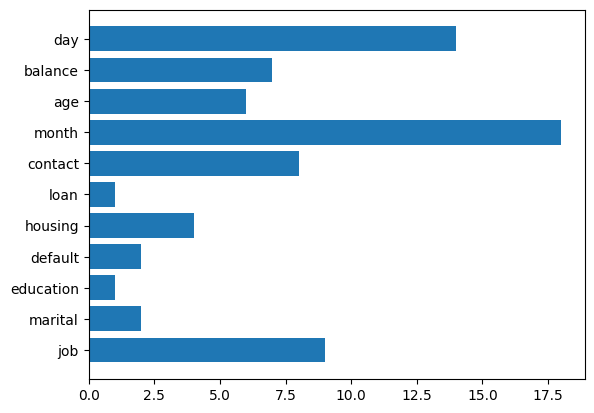

In [5]:
plt.barh(
    automl.model.feature_name_, automl.model.feature_importances_
)

## Fine tunning

# Analysis